## <h1 style="text-align:center; background-color:#00008B; color: #FFFFFF; font-size:44px; font-weight:bold;"> </style> Apartment Rental Prediction</h1>

---

**Name:** Althaf N

**Organization:** Entri Elevate

---

## 1. Overview of Problem Statement

Accurate apartment rental price prediction is essential for both tenants and property managers.

### Importance:
- **For tenants**: Helps in budgeting and decision-making.
- **For property managers**: Assists in setting competitive rental prices.
- **For the market**: Enhances transparency and efficiency.

## 2. Objective

The goal is to develop a reliable machine learning model for predicting rental prices.

### Key Objectives:
- **Build multiple regression models** to predict rental prices.
- **Evaluate models using appropriate performance metrics**.
- **Select the best-performing model** for accurate predictions.

## 3. Data Description

### Dataset Source:
- **UCI Machine Learning Repository**
- https://archive.ics.uci.edu/dataset/555/apartment+for+rent+classified
### Key Features taken:
- **Square Feet**: Total area of the apartment.
- **Bathrooms**: Number of bathrooms.
- **Bedrooms**: Number of bedrooms.
- **Latitude & Longitude**: Location-based features.
- **Price**: The target variable representing the rental price.

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew
from sklearn.preprocessing import PowerTransformer, StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier


**Data Collection**
1. Importing the Dataset

Load the dataset from the specified source (CSV, Excel, Database, or API).
2. Understanding Data Distribution

Gain insights into the data distribution, relationships, and potential patterns.


In [7]:
# Load dataset
df = pd.read_csv('apartment_for_rent .csv')
print(df.shape)
df.head()

(99826, 21)


,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,pets_allowed,...,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
0,housing/rent/apartment,One BR 507 & 509 Esplanade,"This unit is located at 507 & 509 Esplanade, R...",NaN,1,1,USD,No,Thumbnail,Cats,...,2195,Monthly,542,507 509 Esplanade,Redondo Beach,CA,33.8520,-118.3759,RentLingo,1.577360e+09
1,housing/rent/apartment,Three BR 146 Lochview Drive,"This unit is located at 146 Lochview Drive, Ne...",NaN,1.5,3,USD,No,Thumbnail,"Cats,Dogs",...,1250,Monthly,1500,146 Lochview Dr,Newport News,VA,37.0867,-76.4941,RentLingo,1.577360e+09
2,housing/rent/apartment,Three BR 3101 Morningside Drive,This unit is located at 3101 Morningside Drive...,NaN,2,3,USD,No,Thumbnail,NaN,...,1395,Monthly,1650,3101 Morningside Dr,Raleigh,NC,35.8230,-78.6438,RentLingo,1.577360e+09
3,housing/rent/apartment,Two BR 209 Aegean Way,"This unit is located at 209 Aegean Way, Vacavi...",NaN,1,2,USD,No,Thumbnail,"Cats,Dogs",...,1600,Monthly,820,209 Aegean Way,Vacaville,CA,38.3622,-121.9712,RentLingo,1.577360e+09
4,housing/rent/apartment,One BR 4805 Marquette NE,"This unit is located at 4805 Marquette NE, Alb...",NaN,1,1,USD,No,Thumbnail,"Cats,Dogs",...,975,Monthly,624,4805 Marquette NE,Albuquerque,NM,35.1038,-106.6110,RentLingo,1.577360e+09


In [8]:
df.tail()

,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,pets_allowed,...,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
99821,housing/rent/apartment,Houston - superb Apartment nearby fine dining,"Redefining urban living, in southeast Houston,...","Gym,Parking,Patio/Deck,Playground,Storage,Wood...",1.0,1.0,USD,No,Yes,NaN,...,780,Monthly,605,NaN,Houston,TX,29.6151,-95.1998,RentDigs.com,1.544186e+09
99822,housing/rent/apartment,The Best of the Best in the City of Jacksonvil...,Courtney Manor Apartments offer the best of ev...,"AC,Cable or Satellite,Clubhouse,Dishwasher,Gym...",2.0,2.0,USD,No,Yes,"Cats,Dogs",...,813,Monthly,921,NaN,Jacksonville,FL,30.2254,-81.7579,RentDigs.com,1.544186e+09
99823,housing/rent/apartment,A great & large One BR apartment. Pet OK!,"Fully remodeled, new floor, kitchen cabinet, s...","Garbage Disposal,Refrigerator",1.0,1.0,USD,No,Yes,"Cats,Dogs",...,1325,Monthly,650,NaN,San Diego,CA,32.7379,-117.0914,RentDigs.com,1.544186e+09
99824,housing/rent/apartment,"The Crest offers studio, 1, 2 & Three BR homes...","Amenities include a fitness facilities, swimmi...","Gym,Pool",1.0,1.0,USD,No,Yes,"Cats,Dogs",...,931,Monthly,701,NaN,Huntersville,NC,35.4158,-80.8451,RentDigs.com,1.544186e+09
99825,housing/rent/apartment,Large Remodeled Two BR 1. Five BA Apartment Home,This is a brand new 2 Beds 1. five Bathrooms A...,"Gated,Parking,Wood Floors",1.5,2.0,USD,No,Yes,NaN,...,1595,Monthly,900,NaN,San Diego,CA,32.7379,-117.0914,RentDigs.com,1.544186e+09


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99826 entries, 0 to 99825
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   category       99826 non-null  object 
 1   title          99826 non-null  object 
 2   body           99826 non-null  object 
 3   amenities      83749 non-null  object 
 4   bathrooms      99760 non-null  object 
 5   bedrooms       99699 non-null  object 
 6   currency       99822 non-null  object 
 7   fee            99823 non-null  object 
 8   has_photo      99823 non-null  object 
 9   pets_allowed   39192 non-null  object 
 10  price          99821 non-null  float64
 11  price_display  99820 non-null  object 
 12  price_type     99823 non-null  object 
 13  square_feet    99823 non-null  object 
 14  address        7946 non-null   object 
 15  cityname       99521 non-null  object 
 16  state          99521 non-null  object 
 17  latitude       99797 non-null  float64
 18  longit

In [10]:
# Display the data types of each column in the DataFrame
df.dtypes

category          object
title             object
body              object
amenities         object
bathrooms         object
bedrooms          object
currency          object
fee               object
has_photo         object
pets_allowed      object
price            float64
price_display     object
price_type        object
square_feet       object
address           object
cityname          object
state             object
latitude         float64
longitude        float64
source            object
time             float64
dtype: object

In [11]:
# Check for missing values
df.isnull().sum()

category             0
title                0
body                 0
amenities        16077
bathrooms           66
bedrooms           127
currency             4
fee                  3
has_photo            3
pets_allowed     60634
price                5
price_display        6
price_type           3
square_feet          3
address          91880
cityname           305
state              305
latitude            29
longitude           31
source               6
time                 6
dtype: int64

## 4. Data Preprocessing

Cleaning and preparing data for better model performance.

### Steps:
1. **Handle Missing Values**: Use mean/median imputation.
2. **Outlier Detection & Removal**: Identify anomalies using statistical methods.
3. **Transform Skewed Data**: Normalize or apply log transformations if needed.
4. **Encode Categorical Variables**: Convert categorical features using one-hot encoding.

In [13]:
# Display the list of column names in the DataFrame
df.columns

Index(['category', 'title', 'body', 'amenities', 'bathrooms', 'bedrooms',
       'currency', 'fee', 'has_photo', 'pets_allowed', 'price',
       'price_display', 'price_type', 'square_feet', 'address', 'cityname',
       'state', 'latitude', 'longitude', 'source', 'time'],
      dtype='object')

In [14]:
df.shape

(99826, 21)

In [15]:
df.describe()

,price,latitude,longitude,time
count,99821.000000,9.979700e+04,99795.000000,9.982000e+04
mean,1527.208493,3.147604e+04,-91.562177,1.559690e+09
std,903.635759,7.022820e+06,15.819296,1.104487e+07
min,100.000000,1.957380e+01,-159.369800,1.544174e+09
25%,1014.000000,3.374960e+01,-104.791900,1.550832e+09
50%,1350.000000,3.722970e+01,-84.562300,1.568745e+09
75%,1795.000000,3.995390e+01,-77.585300,1.568767e+09
max,52500.000000,1.568782e+09,-68.778800,1.577391e+09


In [16]:
# Fill missing categorical values with mode
cat_cols = ['amenities', 'pets_allowed', 'currency', 'fee', 'has_photo', 
            'price_display', 'price_type', 'source', 'cityname', 'state']

for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True) 

# Convert object-type numeric columns to float
num_cols = ['bathrooms', 'bedrooms', 'square_feet', 'price', 'latitude', 'longitude']

for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Fill missing values in numerical columns with median
df[num_cols] = df[num_cols].fillna(df[num_cols].median())
df['time'].fillna(df['time'].median(), inplace=True)

In [17]:
# Drop columns with excessive missing values
df.drop(columns=['address'], inplace=True, errors='ignore')
# Remove duplicates
df.drop_duplicates(inplace=True)

In [18]:
cat_cols=df.select_dtypes(include=['object'])
cat_cols

,category,title,body,amenities,currency,fee,has_photo,pets_allowed,price_display,price_type,cityname,state,source
0,housing/rent/apartment,One BR 507 & 509 Esplanade,"This unit is located at 507 & 509 Esplanade, R...",Parking,USD,No,Thumbnail,Cats,2195,Monthly,Redondo Beach,CA,RentLingo
1,housing/rent/apartment,Three BR 146 Lochview Drive,"This unit is located at 146 Lochview Drive, Ne...",Parking,USD,No,Thumbnail,"Cats,Dogs",1250,Monthly,Newport News,VA,RentLingo
2,housing/rent/apartment,Three BR 3101 Morningside Drive,This unit is located at 3101 Morningside Drive...,Parking,USD,No,Thumbnail,"Cats,Dogs",1395,Monthly,Raleigh,NC,RentLingo
3,housing/rent/apartment,Two BR 209 Aegean Way,"This unit is located at 209 Aegean Way, Vacavi...",Parking,USD,No,Thumbnail,"Cats,Dogs",1600,Monthly,Vacaville,CA,RentLingo
4,housing/rent/apartment,One BR 4805 Marquette NE,"This unit is located at 4805 Marquette NE, Alb...",Parking,USD,No,Thumbnail,"Cats,Dogs",975,Monthly,Albuquerque,NM,RentLingo
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99821,housing/rent/apartment,Houston - superb Apartment nearby fine dining,"Redefining urban living, in southeast Houston,...","Gym,Parking,Patio/Deck,Playground,Storage,Wood...",USD,No,Yes,"Cats,Dogs",780,Monthly,Houston,TX,RentDigs.com
99822,housing/rent/apartment,The Best of the Best in the City of Jacksonvil...,Courtney Manor Apartments offer the best of ev...,"AC,Cable or Satellite,Clubhouse,Dishwasher,Gym...",USD,No,Yes,"Cats,Dogs",813,Monthly,Jacksonville,FL,RentDigs.com
99823,housing/rent/apartment,A great & large One BR apartment. Pet OK!,"Fully remodeled, new floor, kitchen cabinet, s...","Garbage Disposal,Refrigerator",USD,No,Yes,"Cats,Dogs",1325,Monthly,San Diego,CA,RentDigs.com
99824,housing/rent/apartment,"The Crest offers studio, 1, 2 & Three BR homes...","Amenities include a fitness facilities, swimmi...","Gym,Pool",USD,No,Yes,"Cats,Dogs",931,Monthly,Huntersville,NC,RentDigs.com


In [19]:
df.isnull().sum()

category         0
title            0
body             0
amenities        0
bathrooms        0
bedrooms         0
currency         0
fee              0
has_photo        0
pets_allowed     0
price            0
price_display    0
price_type       0
square_feet      0
cityname         0
state            0
latitude         0
longitude        0
source           0
time             0
dtype: int64

In [20]:
df.duplicated().sum()

0

In [21]:
# Select numerical columns
numerical_features = df.select_dtypes(include=['int64', 'float64'])
# Display numerical columns
print("Numerical Features:\n", numerical_features.columns)
# Display first five rows of numerical features
numerical_features.head()

Numerical Features:
 Index(['bathrooms', 'bedrooms', 'price', 'square_feet', 'latitude',
       'longitude', 'time'],
      dtype='object')


,bathrooms,bedrooms,price,square_feet,latitude,longitude,time
0,1.0,1.0,2195.0,542.0,33.8520,-118.3759,1.577360e+09
1,1.5,3.0,1250.0,1500.0,37.0867,-76.4941,1.577360e+09
2,2.0,3.0,1395.0,1650.0,35.8230,-78.6438,1.577360e+09
3,1.0,2.0,1600.0,820.0,38.3622,-121.9712,1.577360e+09
4,1.0,1.0,975.0,624.0,35.1038,-106.6110,1.577360e+09


## 5. Exploratory Data Analysis (EDA)

EDA helps understand data patterns and relationships.

### Visualization Techniques:
- **Histogram & Boxplot**: Identify distribution and outliers.
- **Pair Plot**: Visualize relationships between variables.
- **Heatmap Correlation**: Analyze feature importance.
- **Bar & Count Plots**: Examine categorical feature distributions.

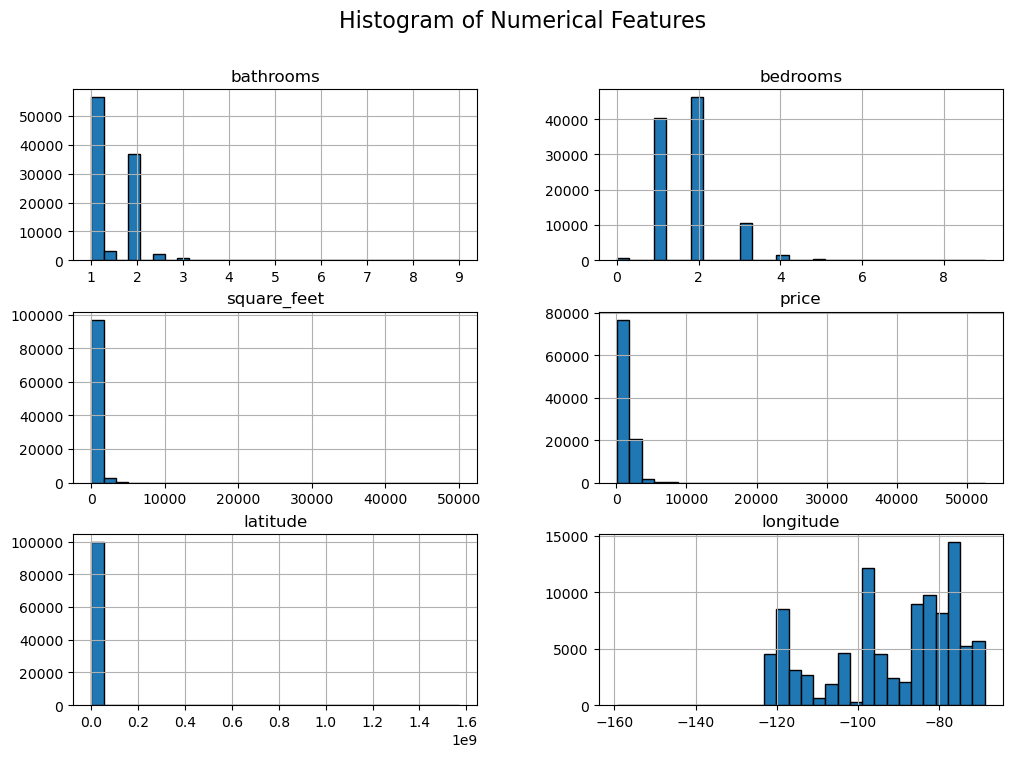

In [23]:
# Histograms
df[num_cols].hist(figsize=(12, 8), bins=30, edgecolor='black')
plt.suptitle("Histogram of Numerical Features", fontsize=16)
plt.show()

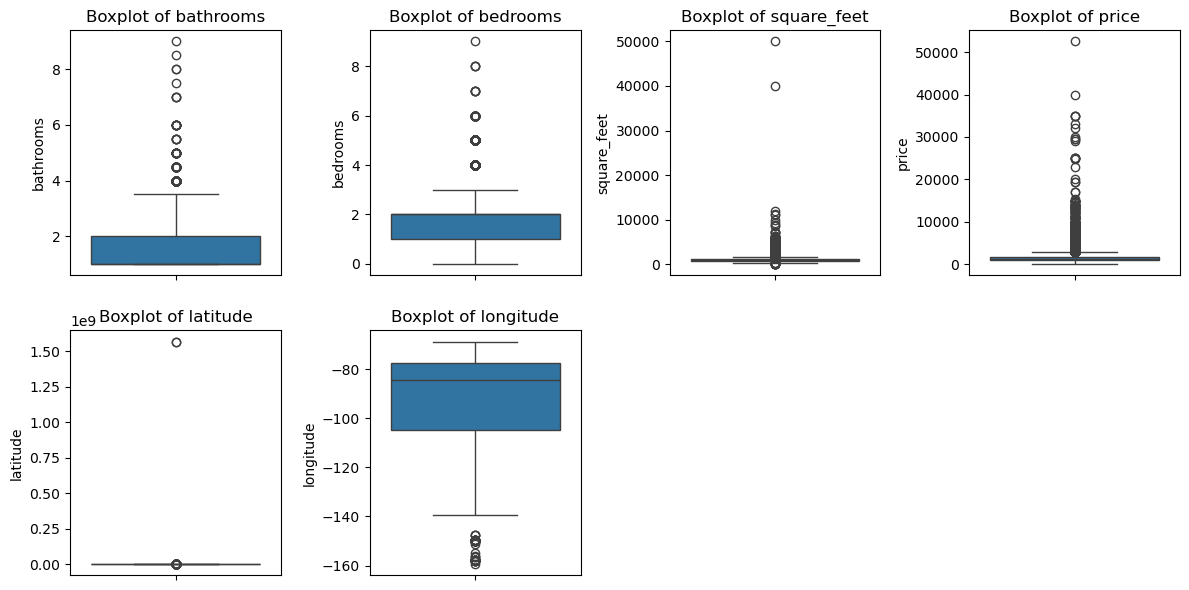

In [24]:
# Boxplots
plt.figure(figsize=(12, 6))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()


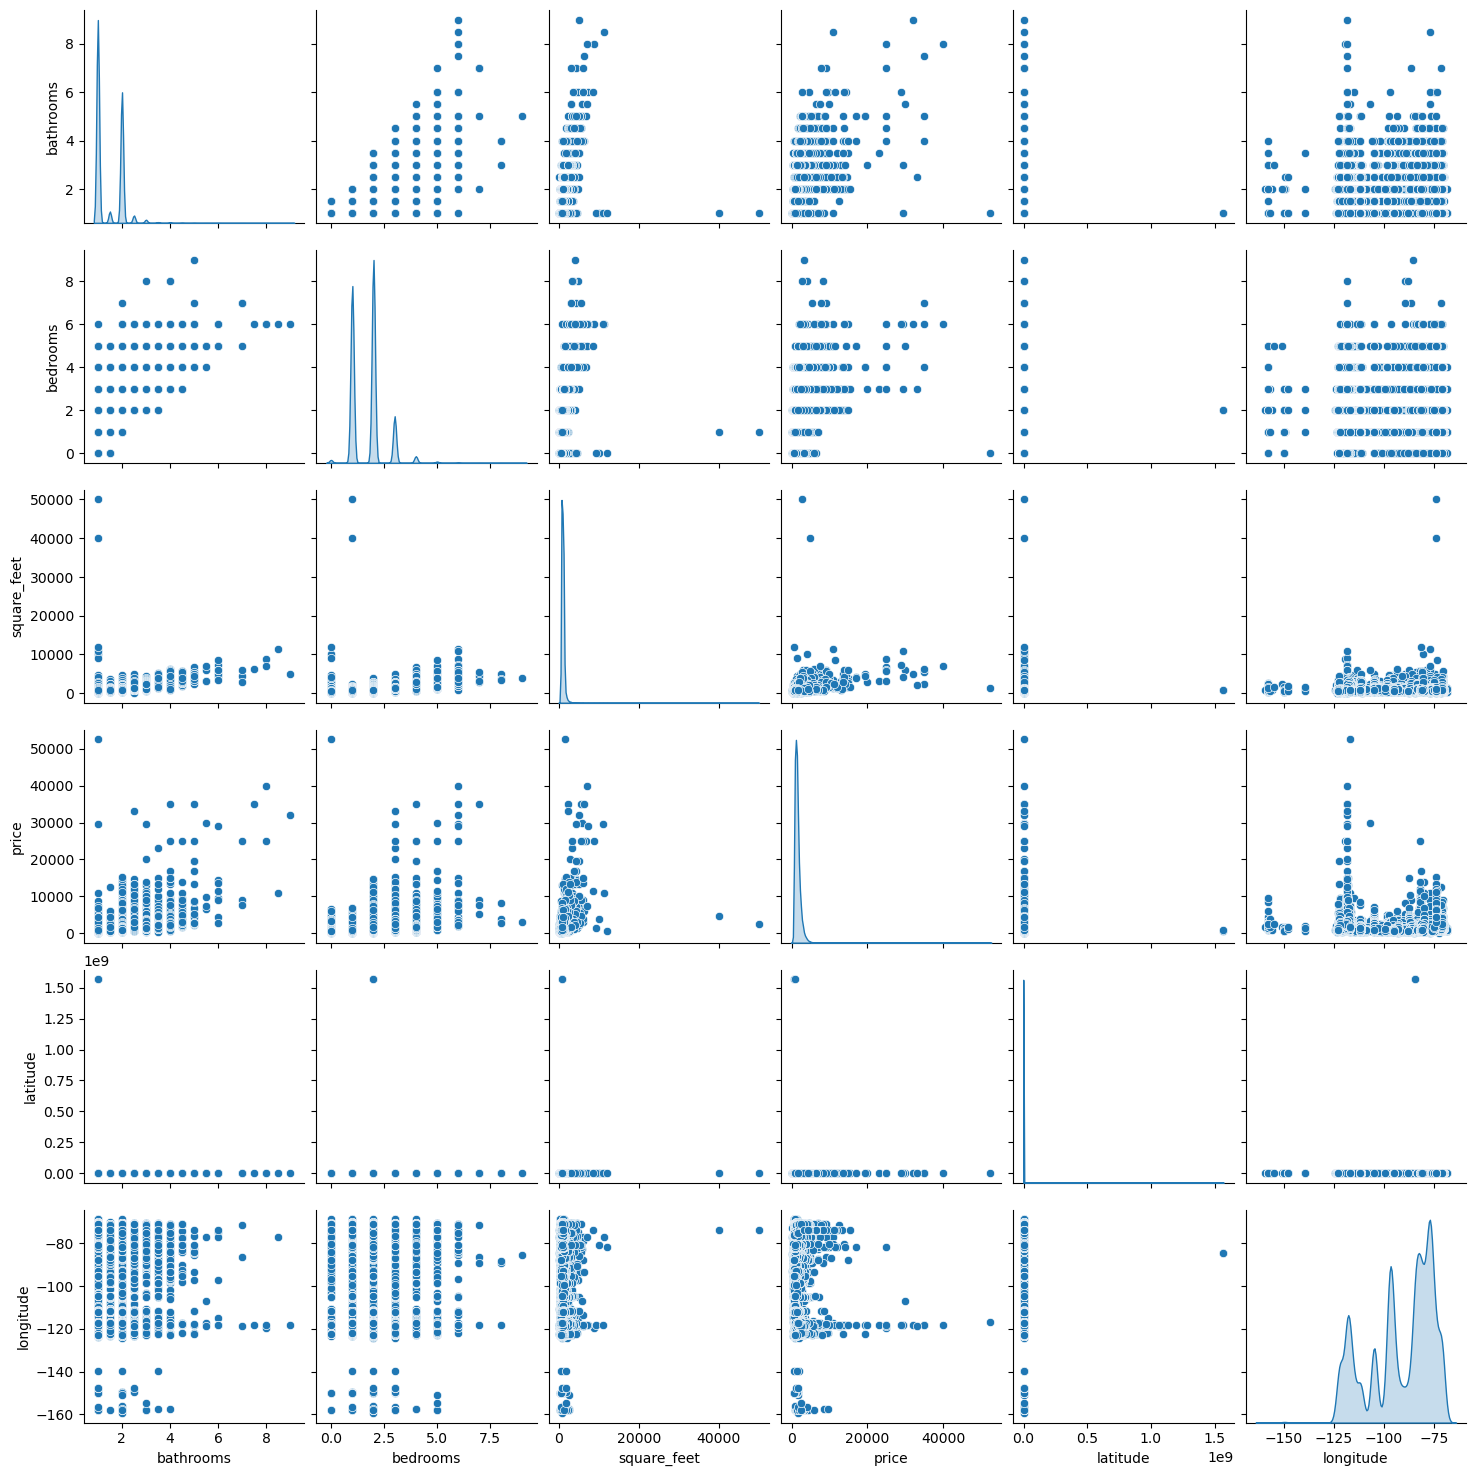

In [25]:
## Pair plot to  relationships between numerical features
sns.pairplot(df[num_cols], diag_kind="kde")
plt.show()

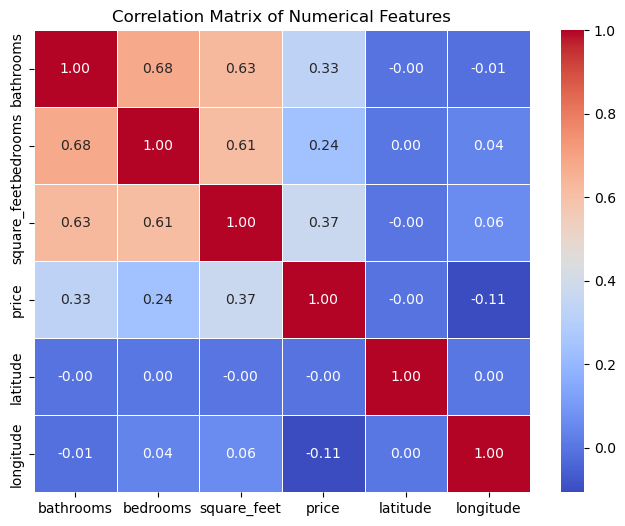

In [26]:
# Heatmap correlation
plt.figure(figsize=(8,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Numerical Features")
plt.show()

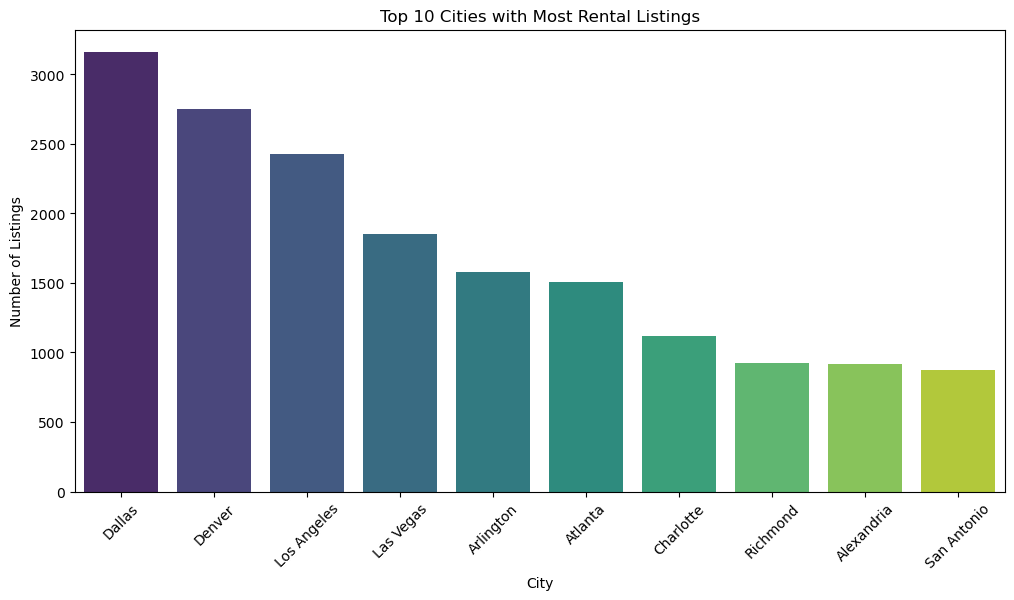

In [27]:
# Bar Plot for Top 10 Cities
plt.figure(figsize=(12,6))
top_cities = df['cityname'].value_counts().nlargest(10)
sns.barplot(x=top_cities.index, y=top_cities.values, palette="viridis")
plt.xticks(rotation=45)
plt.xlabel("City")
plt.ylabel("Number of Listings")
plt.title("Top 10 Cities with Most Rental Listings")
plt.show()

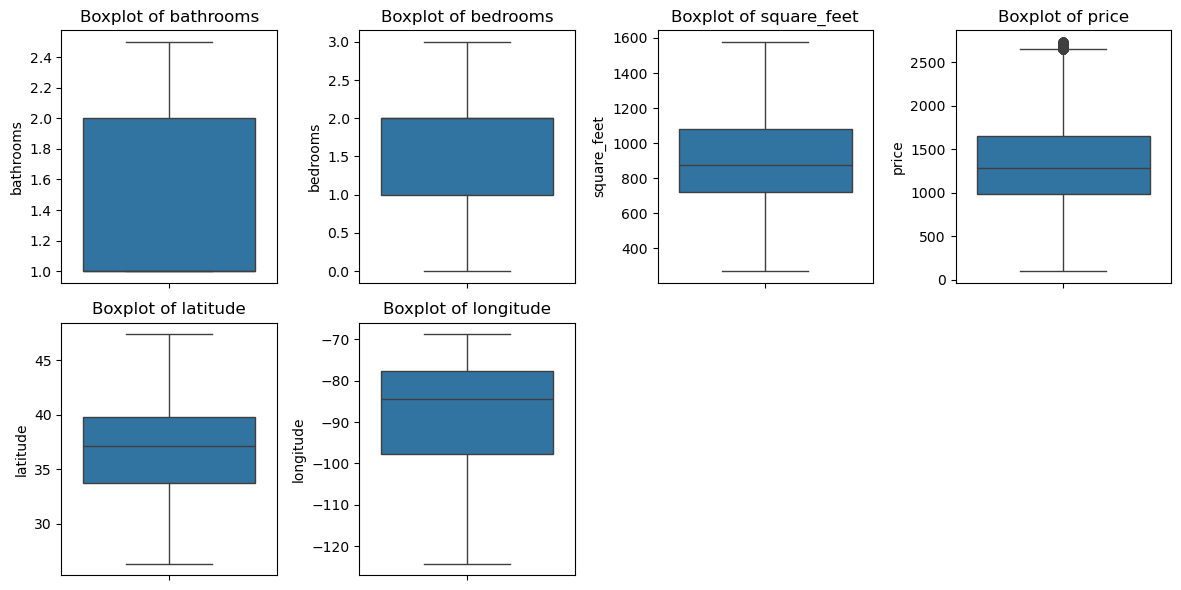

In [28]:
# Define function to remove outliers using IQR
def remove_outliers_iqr(df, threshold=1.2):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    return df[~((df < (Q1 - threshold * IQR)) | (df > (Q3 + threshold * IQR))).any(axis=1)]

# Remove outliers using IQR method
df_cleaned = remove_outliers_iqr(df[num_cols])

# Define function to remove outliers using Z-score
from scipy.stats import zscore
def remove_outliers_zscore(df, threshold=3):
    z_scores = np.abs(zscore(df))
    return df[(z_scores < threshold).all(axis=1)]

# Remove outliers using Z-score method
df_cleaned = remove_outliers_zscore(df_cleaned)

# Plot boxplots after outlier removal
plt.figure(figsize=(12, 6))
for i, column in enumerate(df_cleaned.columns, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(y=df_cleaned[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

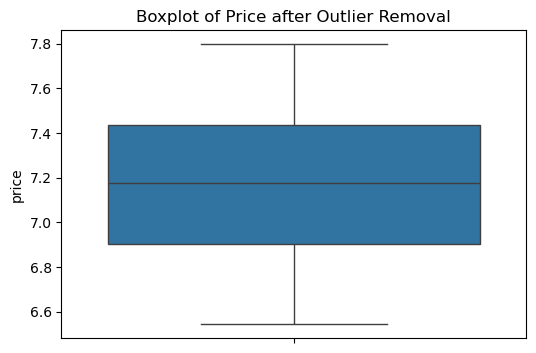

In [29]:
### Outlier Handling ###
def remove_outliers_iqr(df, threshold=1.5):
    """Remove outliers using IQR method"""
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    return df[~((df < (Q1 - threshold * IQR)) | (df > (Q3 + threshold * IQR))).any(axis=1)]
    
# Apply IQR method
df_cleaned = remove_outliers_iqr(df[num_cols])
from scipy.stats.mstats import winsorize
# Winsorization for price column
df_cleaned["price"] = winsorize(df_cleaned["price"], limits=[0.05, 0.05])
# Log Transformation
df_cleaned["price"] = np.log1p(df_cleaned["price"])
# Clipping (5th and 95th percentile)
df_cleaned["price"] = df_cleaned["price"].clip(lower=df_cleaned["price"].quantile(0.05),
                                               upper=df_cleaned["price"].quantile(0.95))
from scipy.stats import zscore
# Final Outlier Removal using Z-score
df_cleaned = df_cleaned[(np.abs(zscore(df_cleaned["price"])) < 2.5)]

# Boxplot after Outlier Removal
plt.figure(figsize=(6, 4))
sns.boxplot(y=df_cleaned["price"])
plt.title("Boxplot of Price after Outlier Removal")
plt.show()

In [30]:
from sklearn.preprocessing import OneHotEncoder
from category_encoders import TargetEncoder
###Encoding Categorical Features ###
# Ensure categorical columns exist in df_cleaned before transformation
cat_cols_present = [col for col in cat_cols if col in df_cleaned.columns]

# Fill missing categorical values using mode (most frequent value)
for col in cat_cols_present:
    most_frequent = df_cleaned[col].mode()[0]  # Get the most frequent value
    df_cleaned[col].fillna(most_frequent, inplace=True)

# Convert categorical columns to string type
df_cleaned[cat_cols_present] = df_cleaned[cat_cols_present].astype(str)

# One-Hot Encoding for low-cardinality categorical columns
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_features = encoder.fit_transform(df_cleaned[cat_cols_present])

# Convert to DataFrame and merge
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(cat_cols_present))
df_cleaned = df_cleaned.drop(columns=cat_cols_present).reset_index(drop=True)
df_cleaned = pd.concat([df_cleaned, encoded_df], axis=1)

# Target Encoding for 'amenities' using 'price' (only if amenities exists)
if 'amenities' in df_cleaned.columns:
    target_encoder = TargetEncoder()
    df_cleaned['amenities'] = target_encoder.fit_transform(df_cleaned['amenities'], df_cleaned['price'])

### **Final Processed Dataset** ###
print(df_cleaned.head())

   bathrooms  bedrooms  square_feet     price  latitude  longitude
0        1.0       1.0        542.0  7.694393   33.8520  -118.3759
1        1.5       3.0       1500.0  7.131699   37.0867   -76.4941
2        2.0       3.0       1650.0  7.241366   35.8230   -78.6438
3        1.0       2.0        820.0  7.378384   38.3622  -121.9712
4        1.0       1.0        624.0  6.883463   35.1038  -106.6110


In [31]:
# Selecting only numerical features from the dataset
num_cols = df_cleaned.select_dtypes(include=['number']).columns
df1 = df_cleaned[num_cols]

# Display the first few rows
df1

,bathrooms,bedrooms,square_feet,price,latitude,longitude
0,1.0,1.0,542.0,7.694393,33.8520,-118.3759
1,1.5,3.0,1500.0,7.131699,37.0867,-76.4941
2,2.0,3.0,1650.0,7.241366,35.8230,-78.6438
3,1.0,2.0,820.0,7.378384,38.3622,-121.9712
4,1.0,1.0,624.0,6.883463,35.1038,-106.6110
...,...,...,...,...,...,...
92350,1.0,1.0,605.0,6.660575,29.6151,-95.1998
92351,2.0,2.0,921.0,6.701960,30.2254,-81.7579
92352,1.0,1.0,650.0,7.189922,32.7379,-117.0914
92353,1.0,1.0,701.0,6.837333,35.4158,-80.8451


## 7. Feature Selection

Selecting the most relevant features for model training.

### Methods:
- **Random Forest Feature Importance**: Identify key influential features.
- **SelectKBest**: Choose top-performing features.
- **Correlation Analysis**: Remove highly correlated redundant features.

In [33]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import PowerTransformer

# Separate features and target
X = df1.drop(columns=['price'])  # Features
y = df1['price']  # Target variable

In [34]:
#feature selection
sk = SelectKBest(score_func = f_regression,k=10)
X_new = sk.fit_transform(X,y)
X_selected = X.columns[sk.get_support()]
print("Selected Features")
print(X_selected)
feature_score = pd.DataFrame({'Feature':X.columns,'Score': sk.scores_}).sort_values(by = 'Score',ascending = False)
print(feature_score)

Selected Features
Index(['bathrooms', 'bedrooms', 'square_feet', 'latitude', 'longitude'], dtype='object')
       Feature         Score
2  square_feet  10978.126308
0    bathrooms   6614.657718
1     bedrooms   2839.232797
3     latitude   1582.355896
4    longitude    253.759148


In [35]:
# Calculating skewness for each numerical feature
df1.skew()

bathrooms      0.588982
bedrooms       0.360637
square_feet    0.296697
price         -0.010366
latitude      -0.044898
longitude     -0.625686
dtype: float64

In [36]:
# Applying Yeo-Johnson Power Transformation
pt = PowerTransformer(method='yeo-johnson')
X_transformed = pt.fit_transform(df1)

In [37]:
X_transformed = (X_transformed - np.mean(X_transformed, axis=0)) / np.std(X_transformed, axis=0)

In [38]:
df1["price"] = np.log1p(df1["price"])

In [39]:
# Converting transformed data back into a DataFrame
df2 = pd.DataFrame(X_transformed, columns = df1.columns )

In [40]:
df2.skew()

bathrooms      0.425123
bedrooms      -0.010354
square_feet   -0.007320
price         -0.012341
latitude      -0.009530
longitude     -0.119942
dtype: float64

- Skewness between -0.5 to 0.5 is considered acceptable (normal-like distribution).

- Your values fall within this range, so you don’t need further transformation.

In [42]:
df2.nunique()

bathrooms         6
bedrooms          4
square_feet    1427
price          1740
latitude       6779
longitude      6826
dtype: int64

In [43]:
# Extract transformed target variable
y = df2['price']
# Extract only the selected features from the transformed dataset
df3 = df2[X_selected]

# Display the final dataset shape
print("Shape of df3:", df3.shape)
print("First few rows of transformed features:\n", df3.head())

Shape of df3: (92355, 5)
First few rows of transformed features:
    bathrooms  bedrooms  square_feet  latitude  longitude
0  -0.818443 -1.009514    -1.512280 -0.683068  -1.523840
1   0.628209  1.835823     2.145153  0.027003   1.049922
2   1.240907  1.835823     2.616987 -0.251205   0.821938
3  -0.818443  0.592889    -0.288754  0.308817  -1.638236
4  -0.818443 -1.009514    -1.129800 -0.409083  -1.072851


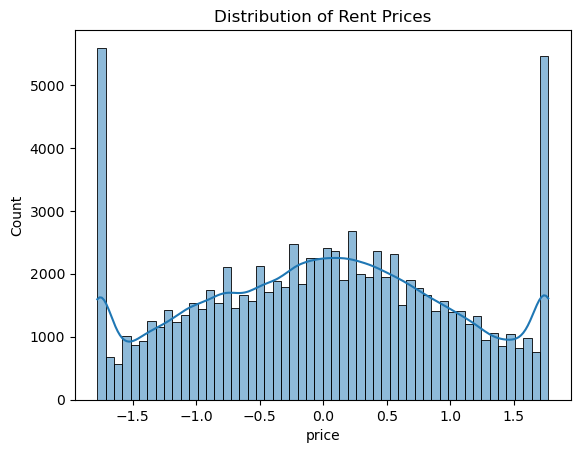

In [44]:
sns.histplot(y, kde=True)
plt.title("Distribution of Rent Prices")
plt.show()

In [45]:
print(y.describe())

count    9.235500e+04
mean    -2.338855e-17
std      1.000005e+00
min     -1.778770e+00
25%     -7.585474e-01
50%      8.905381e-03
75%      7.466394e-01
max      1.769545e+00
Name: price, dtype: float64


# This Means:
Mean is near 0 → This indicates proper standardization.

Standard deviation is 1 → Perfect for models that assume normally distributed data.

Min and max are balanced (~ -1.78 to 1.76) → No extreme skewness.

Is It Good?
Yes, Your price variable is now properly scaled, making it ideal for linear regression and other ML models.

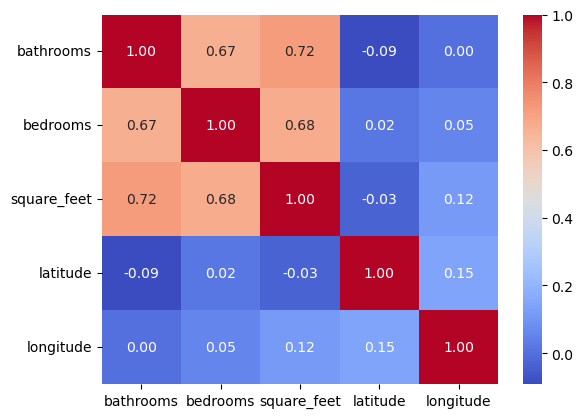

In [47]:
# Compute the correlation matrix for the selected features
correlation = df3.corr()
# Create a heatmap to visualize the correlation between numerical features
sns.heatmap(correlation,annot = True,cmap = 'coolwarm',fmt = '0.2f')
plt.show()

## 8. Feature Scaling in Machine Learning

### Why Feature Scaling?
- Ensures all features contribute equally to the model.
- Improves performance of distance-based algorithms (e.g., KNN, SVM).
- Helps gradient-based optimization methods converge faster.

### Scaling Techniques:
1. **Min-Max Scaling**: Scales features to a range (0,1).
2. **Standardization (Z-score Normalization)**: Centers data around mean with unit variance.

In [49]:
from sklearn.preprocessing import StandardScaler

In [50]:
# Initialize the StandardScaler
scaler = StandardScaler()
# Apply standard scaling to the selected features
X_scaled = scaler.fit_transform(df3) 

In [51]:
# Convert to DataFrame for better readability
X_scaled = pd.DataFrame(X_scaled, columns=df3.columns)
# Display first few rows
print(X_scaled.head())

   bathrooms  bedrooms  square_feet  latitude  longitude
0  -0.818443 -1.009514    -1.512280 -0.683068  -1.523840
1   0.628209  1.835823     2.145153  0.027003   1.049922
2   1.240907  1.835823     2.616987 -0.251205   0.821938
3  -0.818443  0.592889    -0.288754  0.308817  -1.638236
4  -0.818443 -1.009514    -1.129800 -0.409083  -1.072851


## 9. Splitting Data into Training and Testing Sets

### Importance of Splitting Data:
- **Training Set**: Used for learning model parameters.
- **Testing Set**: Evaluates model generalization.
- **Prevents Overfitting**: Ensures performance on unseen data.

### Common Splitting Ratios:
- 80% Training / 20% Testing
- 70% Training / 30% Testing (used in this project)

In [53]:
from sklearn.model_selection import train_test_split
# Splitting the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [54]:
# Displaying the shape of the training and testing sets
print(f"Training set shape: X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Testing set shape: X_test: {X_test.shape}, y_test: {y_test.shape}")

Training set shape: X_train: (73884, 5), y_train: (73884,)
Testing set shape: X_test: (18471, 5), y_test: (18471,)


## 10. Building Machine Learning Models

### Regression Models Implemented:
1. **Linear Regression** - Simple, interpretable baseline.
2. **Decision Tree Regressor** - Handles both linear and nonlinear relationships.
3. **Support Vector Regression (SVR)** - Suitable for small datasets with complex relationships.
4. **Random Forest Regressor** - Ensemble learning method improving accuracy.
5. **Gradient Boosting Regressor** - Boosting technique for better predictions.
6. **MLP Regressor (Multi-Layer Perceptron)** - Neural network-based model.
7. **AdaBoost Regressor** - Boosting technique combining weak learners.

### Steps:
- Train each model on training data.
- Evaluate using **MSE, RMSE, MAE, R² Score**.
- Compare results and select the best-performing model.

In [56]:
# Import Required Libraries
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [57]:
# Define a dictionary with different regression models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Support Vector Regression": SVR(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "MLP Regressor": MLPRegressor(),
    "AdaBoost": AdaBoostRegressor()
}
# Dictionary to store results
results = {}

In [58]:
# Loop through each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    # Make predictions on test data
    y_pred = model.predict(X_test)
    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    # Store results
    results[model_name] = {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R² Score': r2}

In [59]:
# Convert results dictionary to DataFrame for better visualization
results_df = pd.DataFrame(results).T
# Display results sorted by lowest RMSE
print(results_df)

                                MAE       MSE      RMSE  R² Score
Linear Regression          0.758776  0.858067  0.926319  0.137968
Decision Tree              0.283567  0.233673  0.483397  0.765247
Support Vector Regression  0.556894  0.511993  0.715537  0.485641
Random Forest              0.249894  0.148657  0.385560  0.850656
Gradient Boosting          0.470653  0.355870  0.596549  0.642485
MLP Regressor              0.490589  0.392904  0.626820  0.605281
AdaBoost                   0.637967  0.597340  0.772878  0.399899


## Understanding Results

1️. **Best Model → Random Forest**
   - Lowest RMSE (0.385560) → Most accurate predictions.
   - Highest R² Score (0.850656) → Explains 85% of variance in rental prices.
   - Lowest MAE (0.249894) → Least average error.

2️. **Second Best → Decision Tree**
   - RMSE: 0.483397, R²: 0.765247
   - Performs well but slightly worse than Random Forest.

3️. **Linear Regression Performs Poorly**
   - High RMSE (0.926319), Low R² (0.137968) → Fails to capture non-linearity.
   - Likely due to the dataset having complex relationships that Linear Regression cannot model effectively.

4️. **Gradient Boosting & AdaBoost**
   - RMSE: 0.596549 (Gradient Boosting) vs. 0.772878 (AdaBoost).
   - Gradient Boosting does better but is still behind Random Forest.

5️. **SVR, MLP, and AdaBoost**
   - High RMSE values for SVR, MLP, and AdaBoost make them less effective.

### Standardization Analysis:

This Means:
- **Mean is near 0** → Indicates proper standardization.
- **Standard deviation is 1** → Ideal for models that assume normally distributed data.
- **Min and max are balanced (~ -1.78 to 1.76)** → No extreme skewness.

In [61]:
# Sort models by R² score in descending order and Extract the best-performing model (first row after sorting)
best_model = results_df.sort_values(by= 'R² Score',ascending = False).iloc[0]
# Display the best model name and its evaluation metrics
print("Best model is")
print(best_model)

Best model is
MAE         0.249894
MSE         0.148657
RMSE        0.385560
R² Score    0.850656
Name: Random Forest, dtype: float64


## 12. Model Evaluation

Assessing model performance using key evaluation metrics.

### Evaluation Metrics:
- **Mean Absolute Error (MAE)**: Measures average absolute errors.
- **Mean Squared Error (MSE)**: Penalizes larger errors.
- **Root Mean Squared Error (RMSE)**: Interpretable in original units.
- **R² Score**: Explains variance in rental prices.

In [63]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
def evaluate_regression(y_true, y_pred, model_name="Model"):
    """Evaluate regression performance and print metrics."""
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    
    print(f"{model_name} Performance:")
    print(f"MAE: {mae:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R² Score: {r2:.4f}")
    return mae, mse, rmse, r2

## 10. Hyperparameter Tuning

Optimizing model performance by tuning parameters.

### Techniques Used:
- **Grid Search CV**: Exhaustively searches for the best parameter combination.
- **Randomized Search CV**: Selects parameters randomly for faster tuning.
- **Pipeline Implementation**: Automates preprocessing and modeling steps.

In [65]:
# Define a hyperparameter grid for tuning RandomForestRegressor
param_grid = {
    'n_estimators': [100,200],  
    'max_depth': [10, 20,30],  
    'min_samples_split': [2, 5],  
    'min_samples_leaf': [1, 2],  
    'max_features': ['sqrt']
}

In [66]:
# Initialize the RandomForestRegressor model with a fixed random state for reproducibility
rf = RandomForestRegressor(random_state=42)

In [67]:
from sklearn.model_selection import GridSearchCV
# Perform GridSearchCV to tune hyperparameters of the RandomForestRegressor
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring= 'r2', n_jobs=2)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=2,
             param_grid={'max_depth': [10, 20, 30], 'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='r2')

In [68]:
# Print the best hyperparameters found during GridSearchCV
print("Best Parameters:", grid_search.best_params_)
# Print the best R² score achieved with the best parameters
print("Best R² Score:", grid_search.best_score_)

Best Parameters: {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best R² Score: 0.8400873174162505


In [69]:
# Get the best model with optimized hyperparameters
best_rf = grid_search.best_estimator_
# Display the best model (with optimized hyperparameters)
print(best_rf)

RandomForestRegressor(max_depth=30, max_features='sqrt', n_estimators=200,
                      random_state=42)


In [70]:
# Initialize a new RandomForestRegressor model with the optimized hyperparameters ,These hyperparameters were previously identified during the GridSearchCV process
best_rf = RandomForestRegressor(max_depth=20, max_features='sqrt', n_estimators=200,random_state=42)

In [71]:
# Train the RandomForestRegressor model (best_rf) on the training data
best_rf.fit(X_train,y_train)
# Predict on test data
y_pred = best_rf.predict(X_test)
# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
# Print new model performance
print(f"\n After Hyperparameter Tuning:")
print(f"MSE: {mse:.5f}")
print(f"MAE: {mae:.5f}")
print(f"RMSE: {rmse:.5f}")
print(f"R² Score: {r2:.5f}")


 After Hyperparameter Tuning:
MSE: 0.15478
MAE: 0.27180
RMSE: 0.39342
R² Score: 0.84451


## 13. Save the Trained Model

### Steps:
- Save the best-performing model using **joblib** or **pickle**.
- Allows future use without retraining.

In [73]:
import joblib
# Save the trained model as a joblib file
joblib.dump(best_rf, "best_rf_model.joblib")
print("Model saved successfully!")

Model saved successfully!


In [74]:
# Load the saved model
loaded_model = joblib.load("best_rf_model.joblib")
print("Model loaded successfully!")

Model loaded successfully!


## 14. Defining a Machine Learning Pipeline

### Why Pipelines?
- Automates preprocessing, feature selection, and model training.
- Ensures consistency and reproducibility.

### Pipeline Steps:
1. Data Preprocessing (handling missing values, scaling).
2. Feature Engineering (encoding categorical variables).
3. Model Training & Hyperparameter Tuning.

In [76]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

In [77]:
# Define a pipeline with:
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Fill missing values with mean
    ('scaler', StandardScaler()),  # Standardize numerical features
    ('model', best_rf)  # Optimized RandomForestRegressor model
])

In [78]:
# Fit the pipeline on training data
pipeline.fit(X_train, y_train)

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler()),
                ('model',
                 RandomForestRegressor(max_depth=20, max_features='sqrt',
                                       n_estimators=200, random_state=42))])

In [79]:
# Verify the pipeline
print(type(pipeline)) # Should return <class 'sklearn.pipeline.Pipeline'>

<class 'sklearn.pipeline.Pipeline'>


In [80]:
# Use the trained pipeline to make predictions on the test data
y_pred = pipeline.predict(X_test)

In [81]:
# Evaluate the pipeline's performance
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Pipeline Model Performance:")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")

Pipeline Model Performance:
MAE: 0.2718004577566466
MSE: 0.15477059002278618
RMSE: 0.3934089348537806
R² Score: 0.8445142145480067


In [82]:
#Save the trained pipeline
joblib.dump(pipeline,'trained_pipeline.joblib')
print("Pipeline saved successfully!")

Pipeline saved successfully!


In [83]:
# Load the saved pipeline
loaded_pipeline = joblib.load("trained_pipeline.joblib")
print("Pipeline loaded successfully!")

Pipeline loaded successfully!


In [84]:
from xgboost import XGBRegressor

pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('xgb', XGBRegressor(random_state=42))
])


In [85]:
param_grid_xgb = {
    'imputer__strategy': ['mean', 'median'],
    'xgb__n_estimators': [100, 200],
    'xgb__max_depth': [3, 5, 10],
    'xgb__learning_rate': [0.01, 0.1, 0.3]
}

In [86]:
grid_search_xgb = GridSearchCV(
    pipeline,
    param_grid=param_grid_xgb,
    cv=3,
    scoring='r2',
    n_jobs=-1
)

In [87]:
grid_search_xgb.fit(X_train, y_train)

print("XGB Best Params:", grid_search_xgb.best_params_)
print("XGB Best R2 score:", grid_search_xgb.best_score_)

y_pred = grid_search_xgb.best_estimator_.predict(X_test)
evaluate_regression(y_test, y_pred, "XGBoost Regressor (Tuned)")

XGB Best Params: {'imputer__strategy': 'mean', 'xgb__learning_rate': 0.3, 'xgb__max_depth': 10, 'xgb__n_estimators': 200}
XGB Best R2 score: 0.8219469749534474
XGBoost Regressor (Tuned) Performance:
MAE: 0.2711
MSE: 0.1599
RMSE: 0.3999
R² Score: 0.8393


(0.27113524541848166,
 0.15991902308134032,
 0.3998987660412824,
 0.8393419905625684)

## 15. Test with Unseen Data

### Importance:
- Evaluates real-world model performance.
- Detects potential overfitting.

### Testing Process:
- Load new unseen data.
- Apply the trained model to make predictions.
- Compare predicted vs. actual values.

In [89]:
# Load the unseen data from CSV
unseen_data = pd.read_csv("unseen_data.csv")

In [90]:
#convert the unseen data to DataFrame
df_unseen = pd.DataFrame(unseen_data)

In [91]:
# Display the first 5 rows of the DataFrame
df_unseen.head()

,bathrooms,bedrooms,square_feet,latitude,longitude,time
0,3,4,489,37.780840,-122.407813,1619958946
1,1,4,1257,37.730461,-122.491151,1614239650
2,3,1,986,37.709767,-122.480402,1633705760
3,3,1,1257,37.768423,-122.495477,1628346234
4,1,4,862,37.744015,-122.467467,1625488644


In [97]:
# Use the loaded pipeline to make predictions on the unseen data
df_unseen = df_unseen.drop(columns=['time'], errors='ignore')
predictions = loaded_pipeline.predict(df_unseen)

In [99]:
# Print the predicted values
print(f" predictions : {predictions}")

 predictions : [0.94319041 1.00686577 0.88575825 0.88575825 1.00686577 1.00686577
 0.94319041 0.88575825 0.94319041 0.88575825 0.88575825 0.94319041
 1.00686577 0.94319041 0.94319041 1.00686577 0.94319041 0.94319041
 0.94319041 0.94319041]


## 16. Conclusion

### Key Takeaways:
- **Random Forest Regressor** provided the best predictions.
- Feature selection and preprocessing significantly improved accuracy.
- Boosting models like Gradient Boosting performed well but weren’t the best.

## 17. Future Work

### Potential Improvements:
- Implement **Deep Learning Models** for enhanced accuracy.
- Continuously **update the model** with new rental data.
- Improve feature selection using advanced techniques.
- Incorporate external factors (economic indicators, real estate trends).

In [132]:
# Load the model pipeline
import joblib
best_rf_pipeline = joblib.load('trained_pipeline.joblib')

# Load unseen data
predict_data = pd.read_csv('unseen_data.csv')

# Expected features for prediction
selected_features = ['bathrooms', 'bedrooms', 'square_feet' ,'latitude' ,'longitude']

# Ensure correct column order
predict_data = predict_data[selected_features]

# Predict log(price)
log_predictions = best_rf_pipeline.predict(predict_data)

# Inverse log to get original price predictions
price_predictions = np.expm1(log_predictions)

# Add predictions to the DataFrame
predict_data['predicted_price'] = price_predictions

# Save predictions to CSV
predict_data.to_csv('predictions_with_results2.csv', index=False)

print("Predictions complete! File saved as 'predictions_with_results1.csv'.")
predict_data.head()

Predictions complete! File saved as 'predictions_with_results1.csv'.


,bathrooms,bedrooms,square_feet,latitude,longitude,predicted_price
0,3,4,489,37.780840,-122.407813,1.568162
1,1,4,1257,37.730461,-122.491151,1.737009
2,3,1,986,37.709767,-122.480402,1.424822
3,3,1,1257,37.768423,-122.495477,1.424822
4,1,4,862,37.744015,-122.467467,1.737009


In [141]:
importances = best_rf.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X_scaled.columns, 'Importance': importances})
print(feature_importance_df.sort_values(by='Importance', ascending=False))

       Feature  Importance
4    longitude    0.474574
3     latitude    0.250656
2  square_feet    0.200221
0    bathrooms    0.052453
1     bedrooms    0.022097


In [155]:
# Load the trained pipeline
best_rf_pipeline = joblib.load('trained_pipeline.joblib')

# Load unseen data
predict_data = pd.read_csv('unseen_data_1.csv')

# Expected features for prediction (ensure the new columns align)
selected_features = [
    'bathrooms', 'bedrooms', 'square_feet', 'latitude', 'longitude']

# Ensure correct column order
predict_data = predict_data[selected_features]

# Predict log(price)
log_predictions = best_rf_pipeline.predict(predict_data)

# Inverse log to get original price predictions
price_predictions = np.expm1(log_predictions)

# Add predictions to the DataFrame
predict_data['predicted_price'] = price_predictions

# Save predictions to CSV
predict_data.to_csv('predictions_with_results.csv', index=False)

print("Predictions complete! File saved as 'predictions_with_results.csv'.")
print(predict_data.head())

Predictions complete! File saved as 'predictions_with_results.csv'.
   bathrooms  bedrooms  square_feet   latitude   longitude  predicted_price
0          4         1         2692  34.397058 -121.588129         1.424822
1          4         2         1884  33.707134 -119.820113         1.568162
2          4         4         2940  35.950519 -120.390945         1.568162
3          1         5          515  36.489460 -121.231678         1.737009
4          4         1         1126  34.632985 -121.495797         1.424822
